In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import datetime

from src.data.get_data import get_url_data

from src.features.df_functions import str_pad, convert_time


# Load data

In [2]:
%%time
data = get_url_data()

...loading csv
CPU times: user 13.3 s, sys: 1.32 s, total: 14.6 s
Wall time: 16 s


In [38]:
len(data.columns) ==26

True

In [3]:
print('Number of observations: {:,.0f}'.format(len(data)))

Number of observations: 1,827,766


In [4]:
# converts time to timestamps and dconvert 
data = convert_time(data)

In [47]:
len(data.index.time)

1827766

In [6]:
# generate counts for timestamps 
data_time = data['Time Occurred'].groupby(data.index.floor('1min')).agg([ 'count'])
data_time.head()

,count
Date,
2010-01-01 00:01:00,3
2010-01-01 00:02:00,1
2010-01-01 00:05:00,2
2010-01-01 00:10:00,6
2010-01-01 00:15:00,4


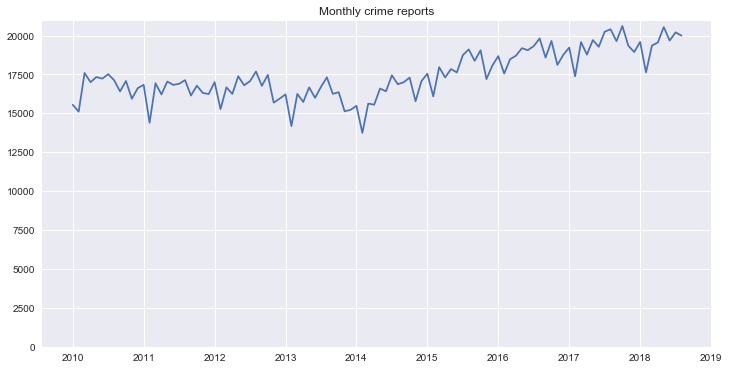

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
title = 'Monthly crime reports'
data_time[data_time.index <=
          '2018-09-01'].resample('M').sum().plot(ax=ax, legend=None, title=title)
plt.ylim(0, None)
plt.xlabel('')

In [8]:
pivoted = data_time.pivot_table('count', index=data_time.index.floor('1min').time, columns=data_time.index.date, fill_value=0)
pivoted.head()

,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-09,2010-01-10,...,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-22
00:01:00,3,8,4,2,5,3,5,3,6,10,...,7,6,10,10,6,13,9,4,6,3
00:02:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:05:00,2,2,2,3,2,3,3,2,0,3,...,3,1,4,1,1,2,2,5,5,2


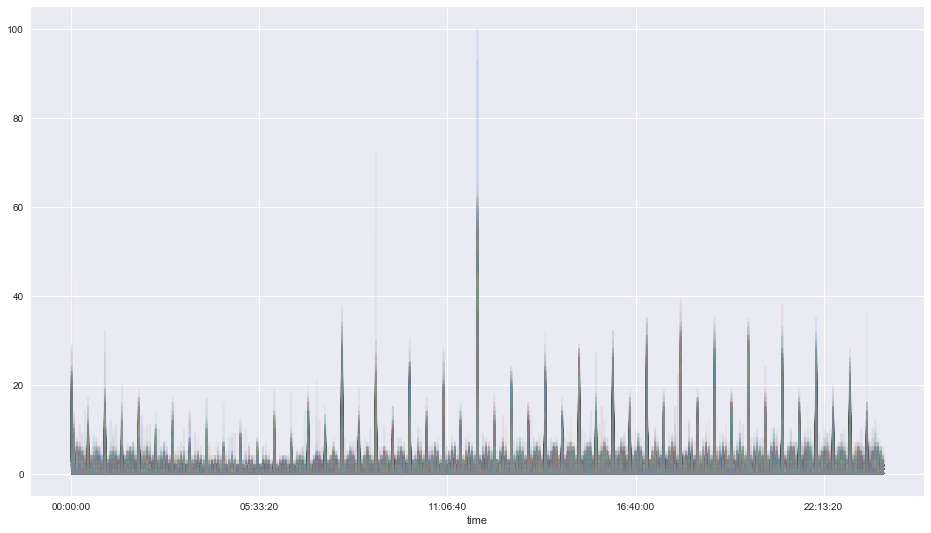

In [9]:
pivoted.plot(legend=False, alpha = 0.1, figsize=(16,9));

# PCA analysis 

In [10]:
# create PCA object
pca= PCA()

In [11]:
# observations in rows 

# calculate loading scores and variation each principle compenent acount for 
scaled_data = pivoted.T
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
# generate coordinates based on loading scores and scaled data
pca_data = pca.transform(scaled_data)

In [13]:
# scree plot
# generate percentage that each PCA accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# generate labels for scree plot
labels = ['PC' + str(num) for num in range(1, len(per_var) + 1)]

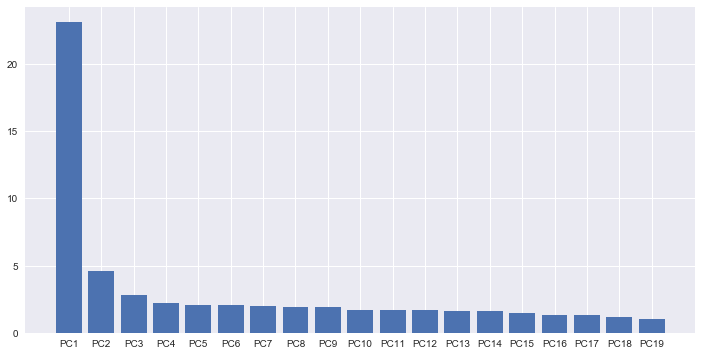

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.bar(left=range(1, 20), height = per_var[0:19], tick_label=labels[0:19])
plt.show()

In [15]:
# generate df with pca coordinates, variables are presented as rows, thus the index should be variable names, the columns represent the different PCA axis 
pca_df = pd.DataFrame(pca_data, index = pivoted.T.index.values,columns=labels)

In [16]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1429,PC1430,PC1431,PC1432,PC1433,PC1434,PC1435,PC1436,PC1437,PC1438
2010-01-01,-47.152188,16.946524,3.404645,0.198449,-4.633534,-1.115146,1.572401,-0.510697,-0.577448,-3.542706,...,0.028720,-0.020969,0.026601,-0.011574,0.005671,-0.019609,-0.009661,-0.005698,0.014349,0.011784
2010-01-02,-35.122274,1.091027,4.436384,4.385195,6.024288,-4.267457,3.185112,2.607650,-2.695581,-2.240907,...,-0.039363,-0.029664,0.016520,-0.027974,-0.015012,-0.006912,0.042668,0.007663,-0.024588,0.012324
2010-01-03,-35.027476,2.779998,-3.652319,2.432474,-0.912626,2.656788,-0.230950,-0.096006,-2.876035,1.910059,...,0.046643,-0.023867,0.023256,-0.048993,0.020619,0.043542,0.002398,0.002390,-0.009306,-0.024460
2010-01-04,-25.848661,-1.949269,1.086502,-1.338002,-2.086197,-1.060601,1.763883,5.046089,-2.654646,-1.901781,...,0.005797,0.025494,-0.014706,-0.080834,0.004578,-0.040916,-0.014588,0.037911,-0.008122,-0.002751
2010-01-05,-17.676446,-3.366142,2.402381,3.131339,0.537546,0.227890,-8.078550,9.418479,-3.550084,0.184492,...,0.019269,0.004990,0.023384,-0.021063,0.013738,0.017831,0.073808,0.010084,0.002871,0.028127


In [17]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

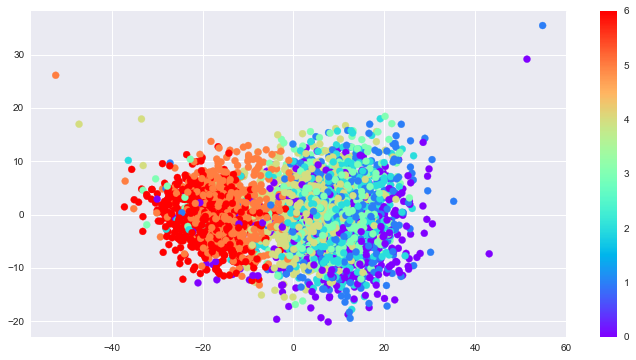

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
plt.scatter(pca_df['PC1'],pca_df['PC2'], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [19]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(scaled_data)
labels = gmm.predict(scaled_data)
labels

array([1, 1, 1, ..., 1, 1, 1])

# Weekend behaviors 

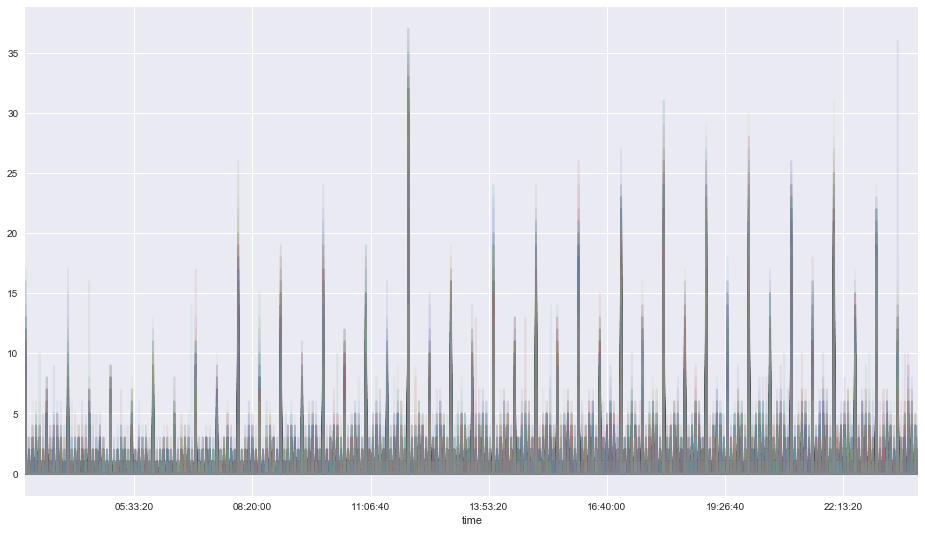

In [20]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1,  figsize=(16,9));
plt.xlim(datetime.time(3, 0),datetime.time(23, 59));

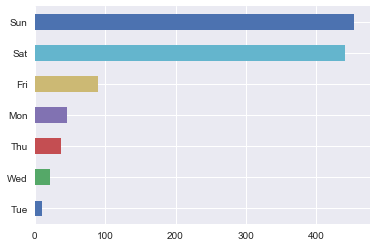

In [21]:
# Isolates weekdays
pd.Series(pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')).value_counts()[::-1].plot(kind='barh');

# Weekday behaviors

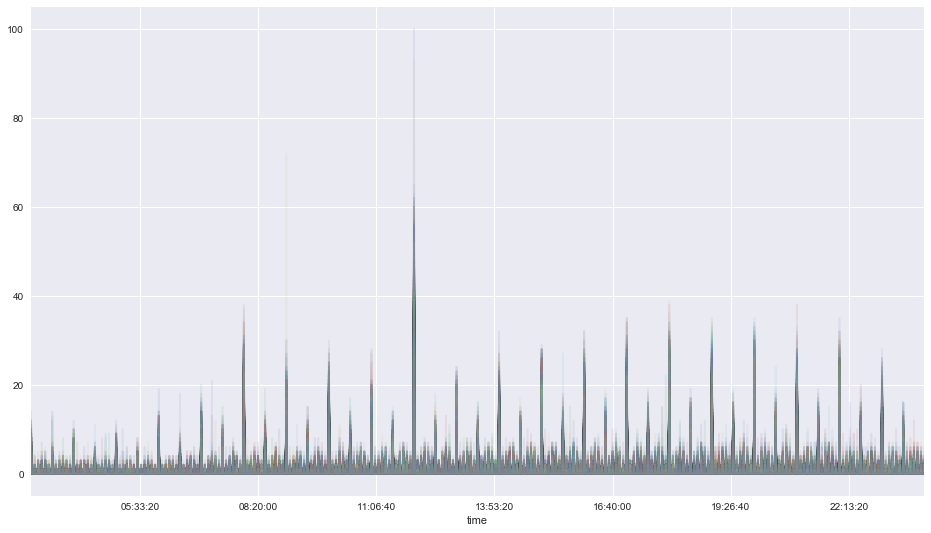

In [22]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==0].T.plot(legend=False, alpha = 0.1,  figsize=(16,9));
plt.xlim(datetime.time(3, 0),datetime.time(23, 59));

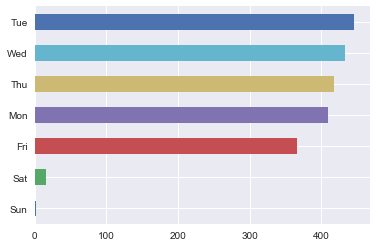

In [23]:
# Isolates weekends
pd.Series(pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')).value_counts()[::-1].plot(kind='barh');

In [24]:
# Solve for Tue
Tue_index  = pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')=='Tue'

In [25]:
# All Tuesdays that behave like Weekends 
pd.DatetimeIndex(pivoted.T[labels==1].index)[Tue_index]

DatetimeIndex(['2010-01-05', '2010-01-12', '2010-01-19', '2010-03-09',
               '2011-02-22', '2012-12-25', '2013-01-01', '2013-12-24',
               '2017-07-04', '2018-09-18'],
              dtype='datetime64[ns]', freq=None)

In [26]:
# Solve for Sun
Sun_index  = pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')=='Sun'

In [27]:
# All Sundays that behave like Weekdays
pd.DatetimeIndex(pivoted.T[labels==0].index)[Sun_index]

DatetimeIndex(['2017-04-30', '2017-10-22'], dtype='datetime64[ns]', freq=None)